# 2 Práctica Separación del conjunto de datos<br>

### Objetivo
Que la o el estudiante aprenda a utilizar las funciones utilizadas para separar los datos en subconjuntos de entrenamiento, validación y prueba que son necesarios para el entranamiento y evaluación de modelos. Asimismo, que conozca como crear subconjuntos con la misma distribución de clase.

### Descripción del procedimiento a seguir
- Se carga el conjunto de datos "Healthcare-Diabetes.csv" obtenido de https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes <br>
- Se construye la matriz X con las columnas de las características
- Se construye el vector y con las etiquetas de los ejemplos
- Se separan los datos en entrenamiento, validación y prueba
- Se grafican las distribuciones de clase de cada subconjunto
- Se separan los datos de forma estratificada para mantener las distribuciones de clase

### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Universidad Autónoma de Coahuila

### Bibliografía
1. https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
3. https://pandas.pydata.org/
4. https://matplotlib.org/
5. https://scikit-learn.org/stable/

### 1. Importar bibliotecas
Para esta práctica se presenta la biblioteca Scikit-learn [https://scikit-learn.org/stable/] enfocada al aprendizaje automático en Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Opcional para cambiar de directorio. Se sustituyen las carpetas por los nombres correspondientes
#cd "/content/drive/MyDrive/Curso ML Diplomado"

In [4]:
#Opcional para conocer el directorio de trabajo
#pwd

### 2. Carga de datos
- Se utiliza la función "read_csv()" de Pandas para cargar el archivo "Healthcare-Diabetes.csv" y almacenarlo en la variable "df"<br>
NOTA: Este archivo debe estar en forma local en tu computadora. Si estas usando "colab" entonces debe estar en tu "google drive".

- Se utiliza la función "tail()" para ver los últimos 5 renglones.
- Vemos cuál es el tamaño de la matriz usando *shape*.

In [5]:
df = pd.read_csv('./Healthcare-Diabetes.csv')
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [6]:
df.shape

(2768, 10)

### 3. Separación de características y etiquetas
- Se crea una nueva variable llamada X que contendrá las características de los ejemplos del dataset.
- Se crea una nueva variable llamada y que contendrá las etiquetas de los ejemplos del dataset.

In [7]:
X = df.iloc[:,:-1]  #Todas las columnas menos la última
y= df.iloc[:,-1] #La última columna

In [8]:
#Para observar que se realizó la separación correctamente
X.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,2,1,85,66,29,0,26.6,0.351,31
2,3,8,183,64,0,0,23.3,0.672,32
3,4,1,89,66,23,94,28.1,0.167,21
4,5,0,137,40,35,168,43.1,2.288,33


In [9]:
#Para observar que se realizó la separación correctamente
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### 4. Separación en subconjuntos de entrenamiento, validación y prueba.
- Se utiliza la función *train_test_split* de la biblioteca Scikit-learn para separar el conjunto de datos introducido en dos. Como un primer paso, se separa en subconjunto de entrenamiento (70%) y uno temporal (30%).
- Posteriormente, se introduce a la función *train_test_split*  el subconjunto temporal para ahora separarlo en dos partes iguales que serán el conjunto de validación y de prueba.
- Finalmente se usa *shape* para conocer los tamaños de los conjuntos separados.

In [10]:
#Separación de los datos en subconjunto de entrenamiento y
# un subconjunto temporal (que contendrá al de validación y prueba)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)

# Separación del conjunto temporal en subconjuntos validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

#X_train = Características para el entrenamiento
#y_train = Etiquetas del conjunto de entrenamiento

#X_val = Características para la validación
#y_val = Etiquetas del conjunto de validación

#X_test = Características para la prueba
#y_test = Etiquetas del conjunto de prueba

In [11]:
X_train.shape

(1937, 9)

In [12]:
X_val.shape

(415, 9)

In [13]:
X_test.shape

(416, 9)

### 5. Graficación de las distribuciones de clase de los subconjuntos
- Generamos una función para graficar subplots
- Creamos una figura de tipo *subplot*
- Graficamos la cantidad de personas con y sin diabetes de cada subconjunto

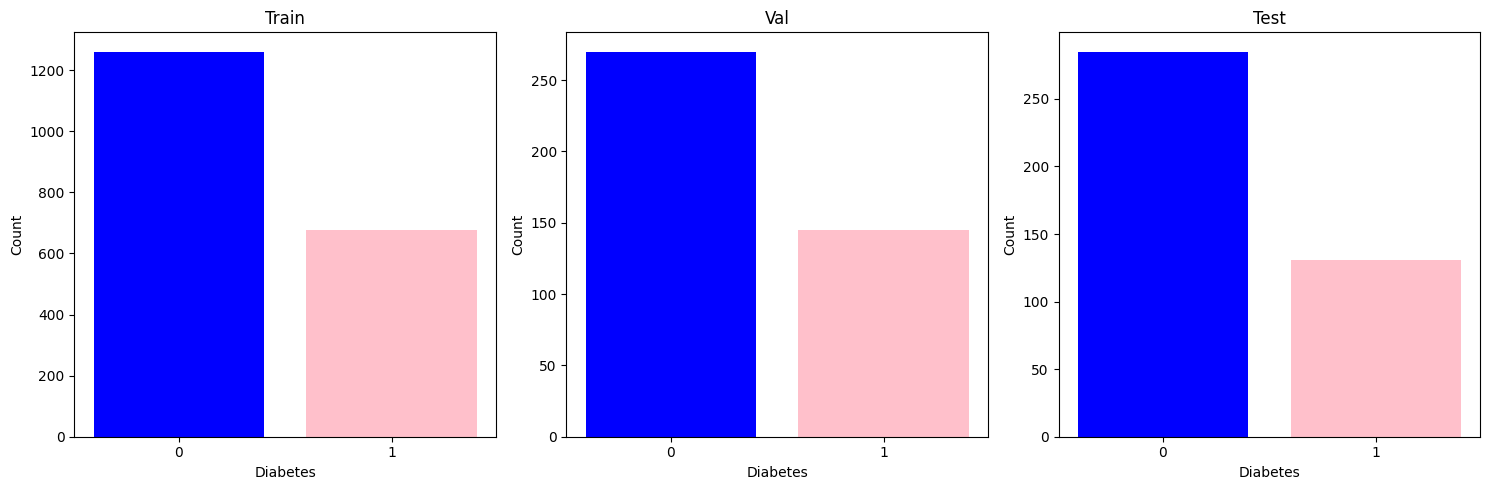

In [14]:
def plot_diabetes_distribution(dataSeries, ax, title):

    diabetes_counts = dataSeries.value_counts()

    ax.set_xticks([0, 1])
    ax.set_xticklabels(diabetes_counts.index)

    ax.bar(diabetes_counts.index, diabetes_counts.values, color=['blue', 'pink'])
    ax.set_xlabel('Diabetes')
    ax.set_ylabel('Count')
    ax.set_title(title)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Llama la función con los datos de las etiquetas
plot_diabetes_distribution(y_train, axes[0], 'Train')
plot_diabetes_distribution(y_val, axes[1], 'Val')
plot_diabetes_distribution(y_test, axes[2], 'Test')

# Ajusta el layout para mejor espacio
plt.tight_layout()


plt.show()


6. Separación de datos estratificada para mantener la distribución de clase
- Agregamos el parámetro *stratify* en la función *train_test_split* para hacer una separación que mantenga la distrbución de clases.
- Graficamos para observar las distribuciones de clase.



In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1937, 9)
Validation set shape: (415, 9)
Test set shape: (416, 9)


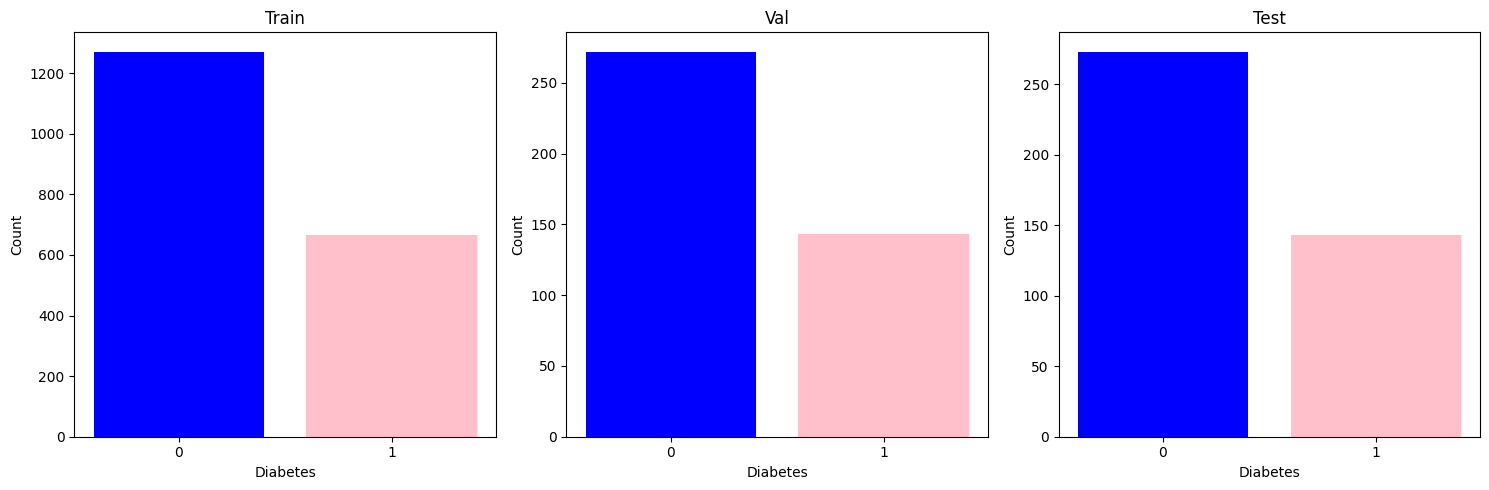

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_diabetes_distribution(y_train, axes[0], 'Train')
plot_diabetes_distribution(y_val, axes[1], 'Val')
plot_diabetes_distribution(y_test, axes[2], 'Test')

plt.tight_layout()

plt.show()

# 7. Ejercicio: Separación de datos estratificada para mantener la distribución de clase del dataset **Apple-Quality** [https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality]
- Separa el conjunto de datos en entrenamiento, validación y prueba asegurando que se mantiene la distribución de clase.
- Grafica la distribución de clase de los subconjuntos. <br>
NOTA: Ten cuidado, puede ser que en la variable *Quality* haya valores de tipo 'nan'. Verifica cuales son los valores de esa columna (investiga sobre el método *unique()*) y si es el caso desecha los renglones con 'nan' (Investiga *dropna*).

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df = pd.read_csv('/content/apple_quality.csv')
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [34]:
df_limpio = df.dropna()
df_limpio = df.dropna(axis=1)
print(df_limpio)

                                Acidity
0                          -0.491590483
1                          -0.722809367
2                           2.621636473
3                           0.790723217
4                           0.501984036
...                                 ...
3996                        1.854235285
3997                       -1.334611391
3998                       -2.229719806
3999                        1.599796456
4000  Created_by_Nidula_Elgiriyewithana

[4001 rows x 1 columns]


In [35]:
X = df.iloc[:,:-1]  #Todas las columnas menos la última
y= df.iloc[:,-1] #La última columna

In [36]:
X.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [37]:
#Separación de los datos en subconjunto de entrenamiento y
#Un subconjunto temporal (que contendrá al de validación y prueba)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)

# Separación del conjunto temporal en subconjuntos validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [38]:
X_train.shape

(2800, 8)

In [39]:
X_val.shape

(600, 8)

In [40]:
X_test.shape

(601, 8)

In [44]:
import matplotlib.pyplot as plt
def plot_apple_quality(dataSeries, ax, title):

    apple_counts = dataSeries.value_counts()

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Bad', 'Good'])

    ax.bar(apple_counts.index, apple_counts.values, color=['blue', 'pink'])
    ax.set_xlabel('Apple')
    ax.set_ylabel('Count')
    ax.set_title(title)

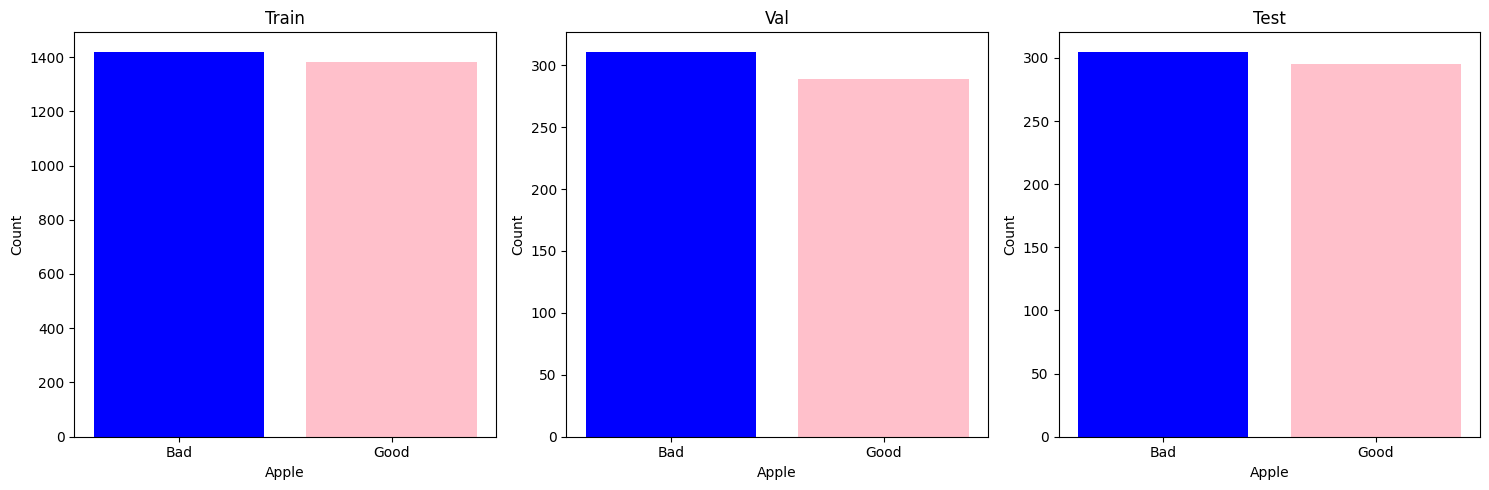

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Llama la función con los datos de las etiquetas
plot_apple_quality(y_train, axes[0], 'Train')
plot_apple_quality(y_val, axes[1], 'Val')
plot_apple_quality(y_test, axes[2], 'Test')

# Ajusta el layout para mejor espacio
plt.tight_layout()


plt.show()